In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import _pickle as cPickle
from collections import defaultdict
from IPython.display import Image

In [2]:
bola_data = pd.read_csv("../DSDA/data/games.csv")
bola_data.head(10)

,GID,SEAS,WEEK,DAY,V,H,STAD,TEMP,HUMD,WSPD,WDIR,COND,SURF,OU,SPRV,PTSV,PTSH
0,1,2000,1,SUN,SF,ATL,Georgia Dome,79.0,\N,\N,\N,Dome,AstroTurf,42.5,7.0,28,36
1,2,2000,1,SUN,JAC,CLE,Cleveland Browns Stadium,78.0,63,9,NE,Sunny,Grass,38.0,-10.0,27,7
2,3,2000,1,SUN,PHI,DAL,Texas Stadium,109.0,19,5,S,Sunny,AstroTurf,40.0,6.0,41,14
3,4,2000,1,SUN,NYJ,GB,Lambeau Field,77.0,66,5,E,Mostly Cloudy,Grass,36.0,2.5,20,16
4,5,2000,1,SUN,IND,KC,Arrowhead Stadium,90.0,50,8,E,Mostly Sunny,Grass,44.0,-3.0,27,14
5,6,2000,1,SUN,SEA,MIA,Pro Player Stadium,89.0,59,13,E,Sunny,Grass,36.0,3.0,0,23
6,7,2000,1,SUN,CHI,MIN,Metrodome,65.0,\N,\N,\N,Dome,AstroTurf,47.0,4.5,27,30
7,8,2000,1,SUN,TB,NE,Foxboro Stadium,71.0,93,5,VAR,Cloudy,Grass,35.5,-3.0,21,16
8,9,2000,1,SUN,DET,NO,Louisiana Superdome,89.0,\N,\N,\N,Dome,AstroTurf,39.5,1.0,14,10
9,10,2000,1,SUN,ARI,NYG,Giants Stadium,80.0,79,3,VAR,Partly Cloudy,Grass,40.0,7.0,16,21


GID : ID/NOMOR
SEAS : tahun tanding
WEEK : pada minggu berapa V & H tanding/bertemu
DAY : pada hari apa V & H tanding/bertemu
V : away_team
H : home_team
STAD : stadion
TEMP : 
HUMD :
WSPD :
WDIR : 
COND : condition/cuaca
SURF :
OU :
SPRV :
PTSV : away_score
PTSH : home_score

In [4]:
bola_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GID     3722 non-null   int64  
 1   SEAS    3722 non-null   int64  
 2   WEEK    3722 non-null   int64  
 3   DAY     3722 non-null   object 
 4   V       3722 non-null   object 
 5   H       3722 non-null   object 
 6   STAD    3722 non-null   object 
 7   TEMP    3202 non-null   float64
 8   HUMD    3717 non-null   object 
 9   WSPD    3717 non-null   object 
 10  WDIR    3717 non-null   object 
 11  COND    3722 non-null   object 
 12  SURF    3714 non-null   object 
 13  OU      3722 non-null   float64
 14  SPRV    3722 non-null   float64
 15  PTSV    3722 non-null   int64  
 16  PTSH    3722 non-null   int64  
dtypes: float64(3), int64(5), object(9)
memory usage: 494.5+ KB


dari menjalankan fungsi head() dan info() diatas diketahui: data terdiri dari : 17 kolom 3722 baris tipe data int64 : 5 (GID, SEAS, WEEK, PTSV, PTSH) object: 9(DAY, V, H, STAD, HUMD, WSPD, WDIR, COND, SURF) float64: 3 (TEMP, OU, SPRV) ada 5 kolom yang mengandung nilai null, yaitu TEMP, HUMD, WSPD, WDIR, SURF (yaitu yang non-nullnya berjumlah kurang dari 3722)



In [5]:
bola_data.describe()

,GID,SEAS,WEEK,TEMP,OU,SPRV,PTSV,PTSH
count,3722.000000,3722.000000,3722.000000,3202.000000,3722.000000,3722.000000,3722.000000,3722.000000
mean,1861.500000,2006.525793,9.533315,58.971580,42.164428,2.550913,20.295809,22.918861
std,1074.593179,4.020908,5.263300,16.417434,4.869801,5.900560,10.195579,10.425965
min,1.000000,2000.000000,1.000000,-1.000000,30.000000,-20.000000,0.000000,0.000000
25%,931.250000,2003.000000,5.000000,48.000000,38.500000,-3.000000,13.000000,16.000000
50%,1861.500000,2007.000000,10.000000,61.000000,42.000000,3.000000,20.000000,23.000000
75%,2791.750000,2010.000000,14.000000,70.000000,45.500000,6.875000,27.000000,30.000000
max,3722.000000,2013.000000,21.000000,109.000000,61.500000,26.500000,59.000000,62.000000


In [6]:
bola_data.isnull()

,GID,SEAS,WEEK,DAY,V,H,STAD,TEMP,HUMD,WSPD,WDIR,COND,SURF,OU,SPRV,PTSV,PTSH
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3718,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3719,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3720,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

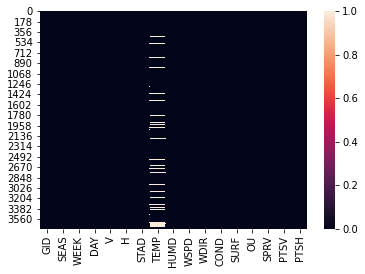

In [7]:
sns.heatmap(bola_data.isnull())

In [3]:
new_bola = bola_data.drop('TEMP',axis=1)

In [4]:
new_bola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GID     3722 non-null   int64  
 1   SEAS    3722 non-null   int64  
 2   WEEK    3722 non-null   int64  
 3   DAY     3722 non-null   object 
 4   V       3722 non-null   object 
 5   H       3722 non-null   object 
 6   STAD    3722 non-null   object 
 7   HUMD    3717 non-null   object 
 8   WSPD    3717 non-null   object 
 9   WDIR    3717 non-null   object 
 10  COND    3722 non-null   object 
 11  SURF    3714 non-null   object 
 12  OU      3722 non-null   float64
 13  SPRV    3722 non-null   float64
 14  PTSV    3722 non-null   int64  
 15  PTSH    3722 non-null   int64  
dtypes: float64(2), int64(5), object(9)
memory usage: 465.4+ KB


In [4]:
new_bola_clean = new_bola.drop(['HUMD','WSPD','WDIR','SURF'],axis=1)

In [5]:
new_bola_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GID     3722 non-null   int64  
 1   SEAS    3722 non-null   int64  
 2   WEEK    3722 non-null   int64  
 3   DAY     3722 non-null   object 
 4   V       3722 non-null   object 
 5   H       3722 non-null   object 
 6   STAD    3722 non-null   object 
 7   COND    3722 non-null   object 
 8   OU      3722 non-null   float64
 9   SPRV    3722 non-null   float64
 10  PTSV    3722 non-null   int64  
 11  PTSH    3722 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 349.1+ KB


In [6]:
def get_winner(PTSH, PTSV, H, V):
   
    if PTSH > PTSV:
        return H
    else:
        return V

In [7]:
new_bola_clean['winner'] = new_bola_clean.apply(lambda x: get_winner(x['PTSH'], x['PTSV'], x['H'], x['V']), axis=1)

In [8]:
new_bola_clean.head()

,GID,SEAS,WEEK,DAY,V,H,STAD,COND,OU,SPRV,PTSV,PTSH,winner
0,1,2000,1,SUN,SF,ATL,Georgia Dome,Dome,42.5,7.0,28,36,ATL
1,2,2000,1,SUN,JAC,CLE,Cleveland Browns Stadium,Sunny,38.0,-10.0,27,7,JAC
2,3,2000,1,SUN,PHI,DAL,Texas Stadium,Sunny,40.0,6.0,41,14,PHI
3,4,2000,1,SUN,NYJ,GB,Lambeau Field,Mostly Cloudy,36.0,2.5,20,16,NYJ
4,5,2000,1,SUN,IND,KC,Arrowhead Stadium,Mostly Sunny,44.0,-3.0,27,14,IND


In [9]:
new_bola_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GID     3722 non-null   int64  
 1   SEAS    3722 non-null   int64  
 2   WEEK    3722 non-null   int64  
 3   DAY     3722 non-null   object 
 4   V       3722 non-null   object 
 5   H       3722 non-null   object 
 6   STAD    3722 non-null   object 
 7   COND    3722 non-null   object 
 8   OU      3722 non-null   float64
 9   SPRV    3722 non-null   float64
 10  PTSV    3722 non-null   int64  
 11  PTSH    3722 non-null   int64  
 12  winner  3722 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 378.1+ KB


<AxesSubplot:xlabel='winner', ylabel='count'>

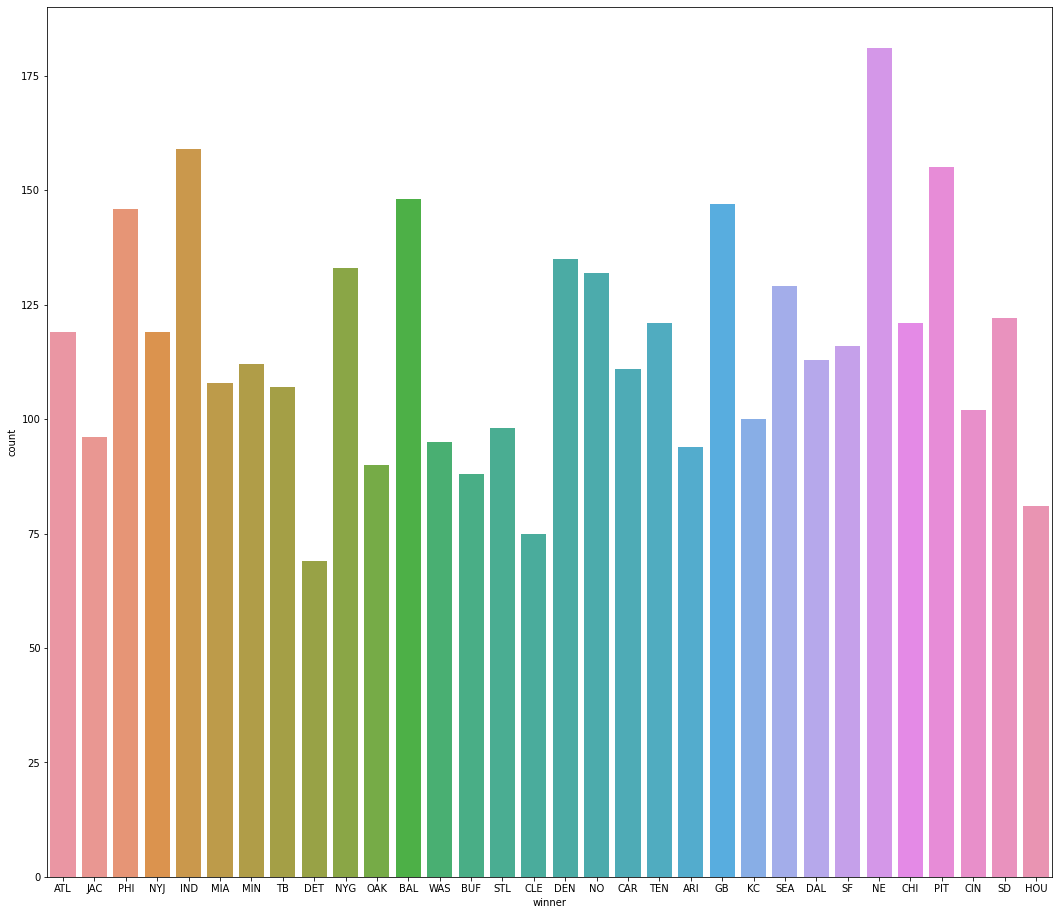

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(18, 16))
sns.countplot(x='winner',data = new_bola_clean)

<AxesSubplot:xlabel='winner'>

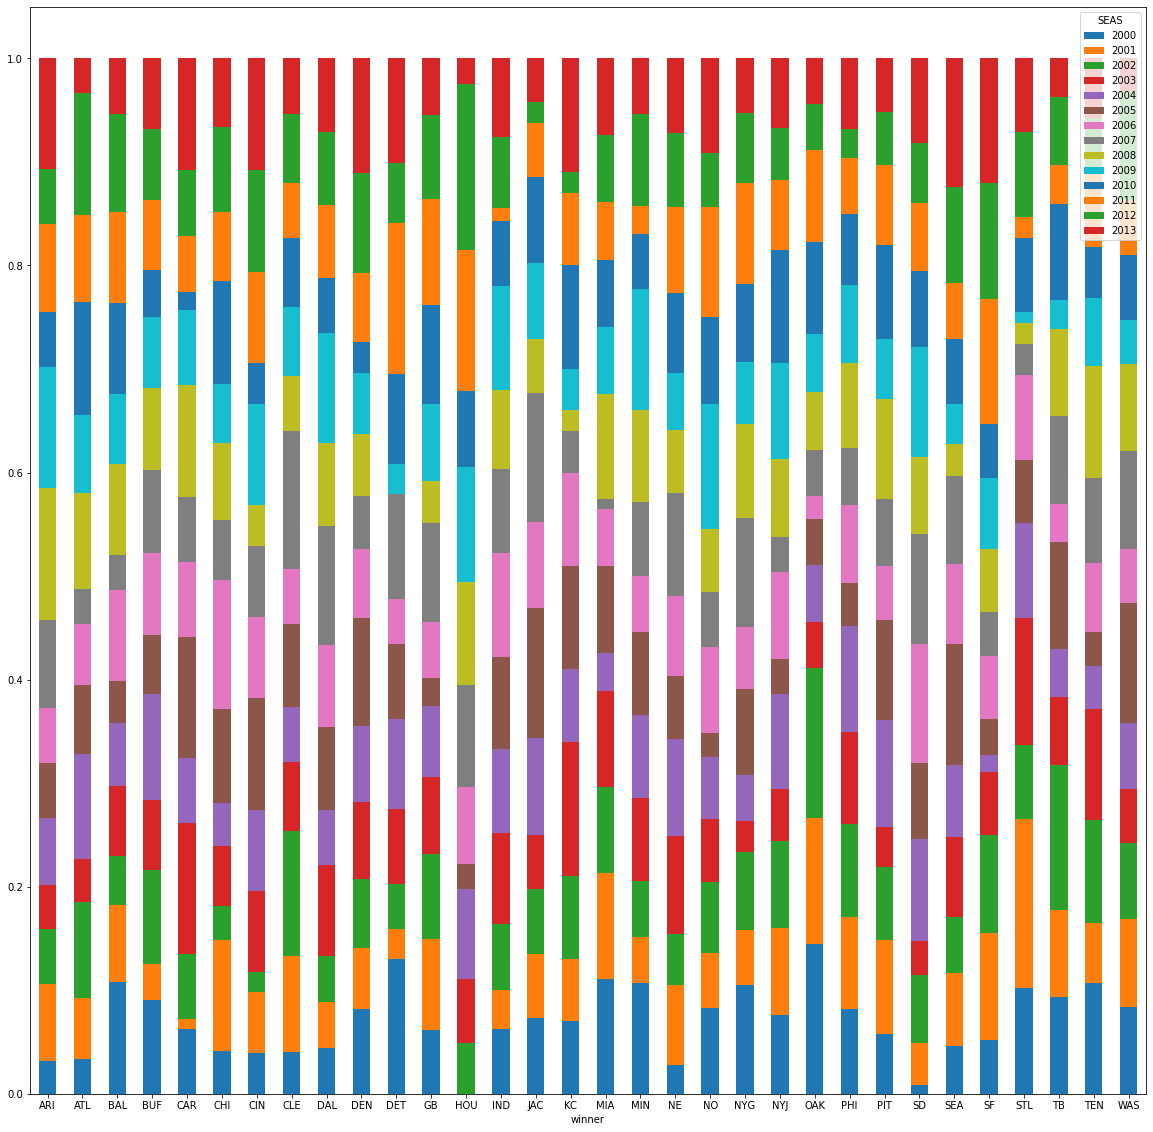

In [12]:
pd.crosstab(new_bola_clean['winner'], new_bola_clean['SEAS'],normalize='index').plot.bar(rot=0,figsize=[(20),(20)],stacked=True)

<AxesSubplot:xlabel='winner'>

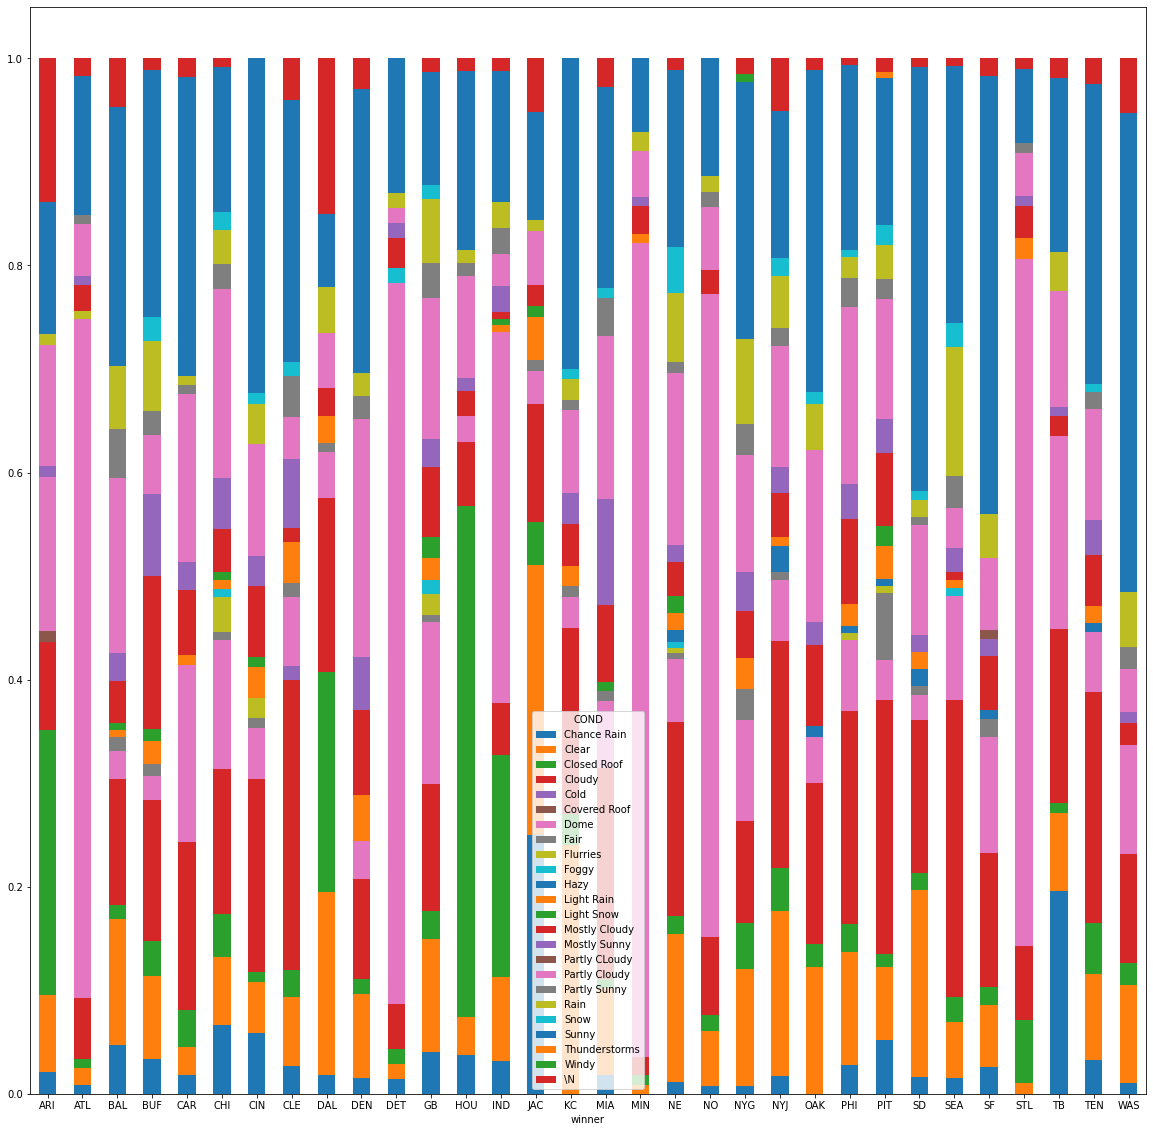

In [13]:
pd.crosstab(new_bola_clean['winner'], new_bola_clean['COND'],normalize='index').plot.bar(rot=0,figsize=[(20),(20)],stacked=True)

In [13]:
new_bola_clean.to_csv('data_football.csv')

In [14]:
new_bola_clean['winner']=new_bola_clean['winner'].map({'ATL': 0,'JAC': 1,'PHI': 2,'NYJ': 3,'IND': 4,'MIA': 5,'MIN': 6,'TB': 7,'DET': 8,'NYG': 9,'OAK': 10,'BAL': 11,'WAS': 12,'BUF': 13,'STL': 14,'CLE': 15,'DEN': 16,'NO': 17,'CAR': 18,'TEN': 19,'ARI': 20,'GB': 21,'KC': 22,'SEA': 23,'DAL': 24,'SF': 25,'NE': 26,'CHI': 27,'PIT': 28,'CIN': 29,'SD': 30,'HOU': 31,})
new_bola_clean

,GID,SEAS,WEEK,DAY,V,H,STAD,COND,OU,SPRV,PTSV,PTSH,winner
0,1,2000,1,SUN,SF,ATL,Georgia Dome,Dome,42.5,7.0,28,36,0
1,2,2000,1,SUN,JAC,CLE,Cleveland Browns Stadium,Sunny,38.0,-10.0,27,7,1
2,3,2000,1,SUN,PHI,DAL,Texas Stadium,Sunny,40.0,6.0,41,14,2
3,4,2000,1,SUN,NYJ,GB,Lambeau Field,Mostly Cloudy,36.0,2.5,20,16,3
4,5,2000,1,SUN,IND,KC,Arrowhead Stadium,Mostly Sunny,44.0,-3.0,27,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,3718,2013,19,SUN,SF,CAR,Bank of America Stadium,Sunny,41.0,0.0,23,10,25
3718,3719,2013,19,SUN,SD,DEN,Sports Authority Field at Mile High,Partly Cloudy,54.5,9.5,17,24,16
3719,3720,2013,20,SUN,NE,DEN,Sports Authority Field at Mile High,Sunny,56.0,5.5,16,26,16
3720,3721,2013,20,SUN,SF,SEA,CenturyLink Field,Cloudy,38.5,3.5,17,23,23


({'ATL': 0,
'JAC': 1,
'PHI': 2,
'NYJ': 3,
'IND': 4,
'MIA': 5,
'MIN': 6,
'TB': 7,
'DET': 8,
'NYG': 9,
'OAK': 10,
'BAL': 11,
'WAS': 12,
'BUF': 13,
'STL': 14,
'CLE': 15,
'DEN': 16,
'NO': 17,
'CAR': 18,
'TEN': 19,
'ARI': 20,
'GB': 21,
'KC': 22,
'SEA': 23,
'DAL': 24,
'SF': 25,
'NE': 26,
'CHI': 27,
'PIT': 28,
'CIN': 29,
'SD': 30,
'HOU': 31,})

In [15]:
new_bola_clean['COND']=new_bola_clean['COND'].map({'Chance Rain': 0,'Clear': 1,'Closed Roof': 2,'Cloudy': 3,'Cold': 4,'Covered Roof': 5,'Dome': 6,'Fair': 7,'Flurries': 8,'Foggy': 9,'Hazy': 10,'Light Rain': 11,'Light Snow': 12,'Mostly Cloudy': 13,'Mostly Sunny': 14,'Partly Cloudy': 15,'Partly Cloudy': 16,'Partly Sunny': 17,'Rain': 18,'Snow': 19,'Sunny': 20,'Thunderstorms': 21,'Windy': 22,'/N': 23,})
new_bola_clean

,GID,SEAS,WEEK,DAY,V,H,STAD,COND,OU,SPRV,PTSV,PTSH,winner
0,1,2000,1,SUN,SF,ATL,Georgia Dome,6.0,42.5,7.0,28,36,0
1,2,2000,1,SUN,JAC,CLE,Cleveland Browns Stadium,20.0,38.0,-10.0,27,7,1
2,3,2000,1,SUN,PHI,DAL,Texas Stadium,20.0,40.0,6.0,41,14,2
3,4,2000,1,SUN,NYJ,GB,Lambeau Field,13.0,36.0,2.5,20,16,3
4,5,2000,1,SUN,IND,KC,Arrowhead Stadium,14.0,44.0,-3.0,27,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,3718,2013,19,SUN,SF,CAR,Bank of America Stadium,20.0,41.0,0.0,23,10,25
3718,3719,2013,19,SUN,SD,DEN,Sports Authority Field at Mile High,16.0,54.5,9.5,17,24,16
3719,3720,2013,20,SUN,NE,DEN,Sports Authority Field at Mile High,20.0,56.0,5.5,16,26,16
3720,3721,2013,20,SUN,SF,SEA,CenturyLink Field,3.0,38.5,3.5,17,23,23


({'Chance Rain': 0,
'Clear': 1,
'Closed Roof': 2,
'Cloudy': 3,
'Cold': 4,
'Covered Roof': 5,
'Dome': 6,
'Fair': 7,
'Flurries': 8,
'Foggy': 9,
'Hazy': 10,
'Light Rain': 11,
'Light Snow': 12,
'Mostly Cloudy': 13,
'Mostly Sunny': 14,
'Partly Cloudy': 15,
'Partly Cloudy': 16,
'Partly Sunny': 17,
'Rain': 18,
'Snow': 19,
'Sunny': 20,
'Thunderstorms': 21,
'Windy': 22,
'/N': 23,})

In [9]:
new_bola_clean.to_csv('data_football baru tanpa mean.csv')

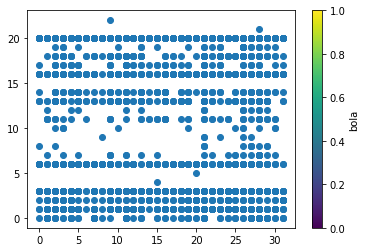

In [21]:
scatter = plt.scatter(new_bola_clean['winner'],new_bola_clean['COND'])
plt.colorbar(scatter, label = 'bola')
plt.show()

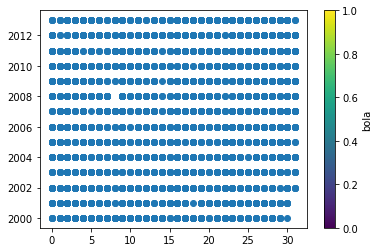

In [16]:
scatter = plt.scatter(new_bola_clean['winner'],new_bola_clean['SEAS'])
plt.colorbar(scatter, label = 'bola')
plt.show()

In [16]:
new_bola_clean['score_diff'] = new_bola_clean.PTSH - new_bola_clean.PTSV

In [17]:
new_bola_clean

,GID,SEAS,WEEK,DAY,V,H,STAD,COND,OU,SPRV,PTSV,PTSH,winner,score_diff
0,1,2000,1,SUN,SF,ATL,Georgia Dome,6.0,42.5,7.0,28,36,0,8
1,2,2000,1,SUN,JAC,CLE,Cleveland Browns Stadium,20.0,38.0,-10.0,27,7,1,-20
2,3,2000,1,SUN,PHI,DAL,Texas Stadium,20.0,40.0,6.0,41,14,2,-27
3,4,2000,1,SUN,NYJ,GB,Lambeau Field,13.0,36.0,2.5,20,16,3,-4
4,5,2000,1,SUN,IND,KC,Arrowhead Stadium,14.0,44.0,-3.0,27,14,4,-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,3718,2013,19,SUN,SF,CAR,Bank of America Stadium,20.0,41.0,0.0,23,10,25,-13
3718,3719,2013,19,SUN,SD,DEN,Sports Authority Field at Mile High,16.0,54.5,9.5,17,24,16,7
3719,3720,2013,20,SUN,NE,DEN,Sports Authority Field at Mile High,20.0,56.0,5.5,16,26,16,10
3720,3721,2013,20,SUN,SF,SEA,CenturyLink Field,3.0,38.5,3.5,17,23,23,6


In [10]:
naming = {'GID':'game_id',
          'SEAS':'year',
          'WEEK':'week',
          'V':'away_team',
          'H':'home_team',
          'PTSV':'away_score',
          'PTSH':'home_score'}
new_bola_clean.rename(columns=naming, inplace=True)

In [11]:
new_bola_clean

,game_id,year,week,DAY,away_team,home_team,STAD,COND,OU,SPRV,away_score,home_score,winner
0,1,2000,1,SUN,SF,ATL,Georgia Dome,Dome,42.5,7.0,28,36,ATL
1,2,2000,1,SUN,JAC,CLE,Cleveland Browns Stadium,Sunny,38.0,-10.0,27,7,JAC
2,3,2000,1,SUN,PHI,DAL,Texas Stadium,Sunny,40.0,6.0,41,14,PHI
3,4,2000,1,SUN,NYJ,GB,Lambeau Field,Mostly Cloudy,36.0,2.5,20,16,NYJ
4,5,2000,1,SUN,IND,KC,Arrowhead Stadium,Mostly Sunny,44.0,-3.0,27,14,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,3718,2013,19,SUN,SF,CAR,Bank of America Stadium,Sunny,41.0,0.0,23,10,SF
3718,3719,2013,19,SUN,SD,DEN,Sports Authority Field at Mile High,Partly Cloudy,54.5,9.5,17,24,DEN
3719,3720,2013,20,SUN,NE,DEN,Sports Authority Field at Mile High,Sunny,56.0,5.5,16,26,DEN
3720,3721,2013,20,SUN,SF,SEA,CenturyLink Field,Cloudy,38.5,3.5,17,23,SEA


In [20]:
def get_data(new_bola_clean):
    """Gets the data in the format required by the baseline model.
  
    Args:
        gamesDF: A pandas dataframe containing games data with following columns.
            'year',
            'week',
            'away_team',
            'home_team',
            'away_score',
            'home_score',
            'winner'
        
    Returns:
        A dictionary which containes data in the format that baseline model expects.
    """
    years = set(new_bola_clean.year)
    baselineData = dict()
    for year in years:
        homeTeams = set(new_bola_clean[new_bola_clean.year == year].home_team)
        homeData = dict()
        for homeTeam in homeTeams:
            awayData = dict()
            for row in new_bola_clean.iterrows():
                if row[1].year == year and row[1].home_team == homeTeam:
                    away_team = row[1].away_team
                    home_score = row[1].home_score
                    away_score = row[1].away_score
                    winner = row[1].winner
                    awayData[away_team] = [home_score, away_score, winner]
            homeData[homeTeam] = awayData
        baselineData[year] = homeData
    return baselineData

In [21]:
cols = ['year','week','away_team','home_team','away_score','home_score','winner']
baselineDF = new_bola_clean[cols]
try:
    data = cPickle.load(open("baselineData.p", "rb"))
except:
    data = get_data(baselineDF)
    cPickle.dump(data, open("baselineData.p", "wb"))

In [28]:
# Creating a dictionary containing team name keyed by its abbreviation.
# memberi nama lengkap tim dari singkatannya
team_dict = {'ARI': 'Arizona Cardinals',
             'ATL': 'Atlanta Falcons',
             'BAL': 'Baltimore Ravens',
             'BUF': 'Buffalo Bills',
             'CAR': 'Carolina Panthers',
             'CHI': 'Chicago Bears',
             'CIN': 'Cincinnati Bengals',
             'CLE': 'Cleveland Browns',
             'DAL': 'Dallas Cowboys',
             'DEN': 'Denver Broncos',
             'DET': 'Detroit Lions',
             'GB' : 'Green Bay Packers',
             'HOU': 'Houston Texans',
             'IND': 'Indianapolis Colts',
             'JAC': 'Jacksonville Jaguars',
             'KC' : 'Kansas City Chiefs',
             'MIA': 'Miami Dolphins',
             'MIN': 'Minnesota Vikings',
             'NE' : 'New England Patriots',
             'NO' : 'New Orleans Saints',
             'NYG': 'New York Giants',
             'NYJ': 'New York Jets',
             'OAK': 'Oakland Raiders',
             'PHI': 'Philadelphia Eagles',
             'PIT': 'Pittsburgh Steelers',
             'SD' : 'San Diego Chargers',
             'SEA': 'Seattle Seahawks',
             'SF' : 'San Francisco 49ers',
             'STL': 'St. Louis Rams',
             'TB' : 'Tampa Bay Buccaneers',
             'TEN': 'Tennessee Titans',
             'WAS': 'Washington Redskins'}

In [29]:
def get_team_name(abbr):
    """Returns team name given its abbreviation.
    
    Uses mapping in the dictionary team_dict to return the team name.
  
    Args:
        abbr: A string which is a team abbreviation.
        
    Returns:
        A string which is a mapping of team abbreviation to team name.
    """
    return team_dict[abbr]

Baseline Model
This baseline model is a "Point Score Difference Model". In this model we take the point difference (difference of total point scored and total points allowed) to calculate the probability of a team to win. In mathematical representation, point score difference model can be written as:

𝑀.𝑟=𝑝
where,
𝑀 is a 32x32 matrix (32 teams)
𝑟 is a vector of size 32.
𝑝 is a vector of size 32.

𝑀 has the number of games played by each team on the diagonal, and the negation of the number of times each team played head-to-head on the off-diagonal spots.

𝑟 vector is a list of the average end-of-regular season point differentials for each team.
𝑟=𝑝𝑜𝑖𝑛𝑡𝑠 𝑠𝑐𝑜𝑟𝑒𝑑 𝑏𝑦 𝑡ℎ𝑒 𝑡𝑒𝑎𝑚 − 𝑝𝑜𝑖𝑛𝑡𝑠 𝑙𝑜𝑠𝑡 𝑡𝑜 𝑡ℎ𝑒 𝑜𝑡ℎ𝑒𝑟 𝑡𝑒𝑎𝑚𝑡𝑜𝑡𝑎𝑙 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑔𝑎𝑚𝑒𝑠 𝑝𝑙𝑎𝑦𝑒𝑑 𝑏𝑦 𝑡ℎ𝑒 𝑡𝑒𝑎𝑚
.

𝑝 is our prediction vector.

In [30]:
def get_avg_team_score(data):
    
    # Menghitung skor tim rata-rata untuk tahun tertentu.
    """Calculates average team score for a given year.

    Given yearly data, this dataframe computes the average team score using formula,
    avg_score = (points_scored - points_allowed)/num_games_played
    
    Args:
        data: A python dictionary containing data in the following format.
            Winner has either TeamX or TeamY based on who wins the game.
            {'Team1':
                {'Team2': [Team1Score, Team2Score, Winner],
                 'Team3': [Team1Score, Team3Score, Winner],
                  ...
                }
             'Team2':
                {'Team1': [Team1Score, Team2Score, Winner],
                 'Team3': [Team1Score, Team3Score, Winner],
                  ...
                }
             ...
            }

    Returns:
        A dictionary containing average team scores.
    """
    p = dict()
    for team1, value in data.items():
        t1 = team1
        p[t1] = defaultdict(list)
        for team2, stats in value.items():
            t2 = team2
            t1_score = stats[0]
            t2_score = stats[1]
            winner = stats[2]
            p[t1][t2].append([t1_score, t2_score])
    for team1, value in data.items():
        t1 = team1
        for team2, stats in value.items():
            t2 = team2
            t1_score = stats[0]
            t2_score = stats[1]
            winner = stats[2]
            if p.__contains__(t2):
                p[t2][t1].append([t2_score, t1_score])
    sumScores = {}
    for t1, val in p.items():
        t1_score = 0
        t2_score = 0
        numGames = 0
        for t2, v in val.items():
            numGames = numGames + len(v)
            for s in v:
                t1_score = t1_score + s[0]
                t2_score = t2_score + s[1]
        sumScores[t1] = [t1_score, t2_score, numGames]
    pNew = dict()
    for team, scores in sumScores.items():
        pNew[team] = (scores[0] - scores[1])/scores[2]
    return pNew

In [31]:
def get_yearly_winners(data):
    
    # Mendapatkan pemenang untuk tahun tertentu
    """Gets winner for a given year

    Given yearly data, this dataframe computes point difference using the
    formula,
    
    menghitung perbedaan poin menggunakan
    rumus,
    M.r = p
    where,
        M is a 32x32 matrix (32 teams).
        r is a vector of size 32.
        p is a vector of size 32.
    
    - M has the number of games played by each team on the diagonal, and the
      negation of the number of times each team played head-to-head on the
      off-diagonal spots.
    
    - r vector is a list of the average end-of-regular season point
      differentials for each team.
      ((points scored - points allowed) / total number of games played by the team)

    - p is our prediction vector. 

    Args:
        data: A python dictionary containing data in the following format.
            Winner has either TeamX or TeamY based on who wins the game.
            {'Team1':
                {'Team2': [Team1Score, Team2Score, Winner],
                 'Team3': [Team1Score, Team3Score, Winner],
                  ...
                }
             'Team2':
                {'Team1': [Team1Score, Team2Score, Winner],
                 'Team3': [Team1Score, Team3Score, Winner],
                  ...
                }
             ...
            }

    Returns:
        A tuple containing pandas dataframes representing point difference
        and average team score.
        
        For example: (pDiff, r)
            pDiff: Pandas dataframe containing point differences
            r: Pandas dataframe containing average team scores.
    """
    # Create a matrix M and vector r in pandas Dataframe.
    result = dict()
    fin = result
    for team1, value in data.items():
        t1 = team1
        fin[t1] = dict()
        for team2, stats in value.items():
            t2 = team2
            t1_score = stats[0]
            t2_score = stats[1]
            winner = stats[2]
            count = 0
            if fin.__contains__(t2) and fin[t2].__contains__(t1):
                temp = fin[t2][t1] - 1
                fin[t1][t2] = temp
                fin[t2][t1] = temp
            else:
                fin[t1][t2] = count - 1
    fin = pd.DataFrame(fin).to_dict()
    homeTeams = list(set(fin.keys()))
    awayTeams = []
    for key in homeTeams:
        awayTeams = awayTeams
    awayTeams = list(set(awayTeams))
    allTeams = list(set(homeTeams + awayTeams))

    # Updating inverse games
    for t in allTeams:
        t1 = t
        for t in allTeams:
            t2 = t
            val1 = fin[t1][t2]
            val2 = fin[t2][t1]
            if not pd.isnull(val1):
                if not pd.isnull(val2):
                    if val1 == val2:
                        continue
                    else:
                        print ("Aha check", t1, val1, t2, val2)
                else:
                    fin[t2][t1] = val1
            if not pd.isnull(val2):
                if not pd.isnull(val1):
                    if val1 == val2:
                        continue
                    else:
                        print ("Aha check", t2, val2, t1, val1)
                else:
                    fin[t1][t2] = val2
    
    # Making NaNs 0
    for t in allTeams:
        t1 = t
        for t in allTeams:
            t2 = t
            val1 = fin[t1][t2]
            val2 = fin[t2][t1]
            if pd.isnull(val1):
                if pd.isnull(val2):
                    fin[t1][t2] = 0
                    fin[t2][t1] = 0     
    # Add diaginal values.
    for k, v in fin.items():
        row_sum = abs(sum(v.values()))
        for k2, v2 in v.items():
            if k == k2:
                fin[k][k2] = row_sum
    M = pd.DataFrame(fin)
    p = get_avg_team_score(data)
    r = pd.DataFrame.from_dict(p, orient='index').sort_index()
    P = M.dot(r)
    P.columns = ['point_diff']
    P['abbr'] = P.index
    P['team'] = P.abbr.apply(get_team_name)
    P = P.sort_values('point_diff', ascending=False)
    pDiff = P.loc[:,['team', 'point_diff']]
    r.columns = ['avg_score']
    r = r.sort_values('avg_score', ascending=False)
    return (pDiff, r)

In [62]:
# Get winner for all the years
def get_winners(data):
    
    # Dapatkan pemenang untuk semua tahun 
    """Gets winner for all the years by calling get_yearly_winners(data[year])
    for every year's data.

    Args:
        data: A python dictionary containing data in the following format.
            Winner has either TeamX or TeamY based on who wins the game.
            {year1:
                {'Team1':
                    {'Team2': [Team1Score, Team2Score, Winner],
                     'Team3': [Team1Score, Team3Score, Winner],
                      ...
                    }
                 'Team2':
                    {'Team1': [Team1Score, Team2Score, Winner],
                     'Team3': [Team1Score, Team3Score, Winner],
                      ...
                    }
                 ...
                }
             year2:
                {'Team1':
                    {'Team2': [Team1Score, Team2Score, Winner],
                     'Team3': [Team1Score, Team3Score, Winner],
                      ...
                    }
                 'Team2':
                    {'Team1': [Team1Score, Team2Score, Winner],
                     'Team3': [Team1Score, Team3Score, Winner],
                      ...
                    }
                 ...
                }
             ...
            }

    Returns:
        A dictionary containing point differences and average scores for all years.
        The key contains the year and the value contains list of pandas dataframes
        that represent point differences and average team scores.
    """
    years = data.get(0)
    result = dict()
    for year in get_data(new_bola_clean) :
        pDiff, avgScore = get_yearly_winners(data[year])
        result[year] = [pDiff, avgScore]
    return result

In [34]:
bola = get_winners(data)

In [35]:
diff, avgScore = bola[2000]

In [36]:
diff

,team,point_diff
BAL,Baltimore Ravens,264.318219
OAK,Oakland Raiders,213.152670
PHI,Philadelphia Eagles,179.750817
TEN,Tennessee Titans,150.504278
DEN,Denver Broncos,132.696379
TB,Tampa Bay Buccaneers,117.453431
NYG,New York Giants,112.405121
IND,Indianapolis Colts,90.978350
MIA,Miami Dolphins,79.410432
STL,St. Louis Rams,79.157271


In [37]:
diff, avgScore = bola[2013]

In [38]:
diff

,team,point_diff
DEN,Denver Broncos,202.162173
SEA,Seattle Seahawks,177.483660
SF,San Francisco 49ers,166.783497
KC,Kansas City Chiefs,151.921569
CIN,Cincinnati Bengals,126.191585
NE,New England Patriots,122.130719
NO,New Orleans Saints,121.073938
CAR,Carolina Panthers,103.305964
PHI,Philadelphia Eagles,75.684641
SD,San Diego Chargers,51.509395


In [44]:
def plot_barchart(dataFrame, kind='point_diff'):
    """Plots batchart given a pandas dataframe based on the kind of ranking passed.
    By default 'point_diff' is the 'ranking kind'.
    
    plot batchart diberi kerangka dataframe pandas berdasarkan jenis peringkat yang lolos.
    Secara default 'point_diff' adalah 'jenis peringkat'.

    Args:
        dataFrame: A pandas dataframe containing a column of point differences.
            Index of dataFrame should cintain tea abbreviations.
            dataFrame column contains point differemces for the team in the index.
        kind: Can contain one of two values, 'point_diff' or 'avg_score'.

    Returns:
        None
    """
    if kind == 'point_diff':
        plt.figure(figsize=(15, 9))
        dataFrame.T.iloc[1].plot(kind='bar')
    if kind == 'avg_score':
        plt.figure(figsize=(15, 9))
        dataFrame.T.iloc[0].plot(kind='bar')

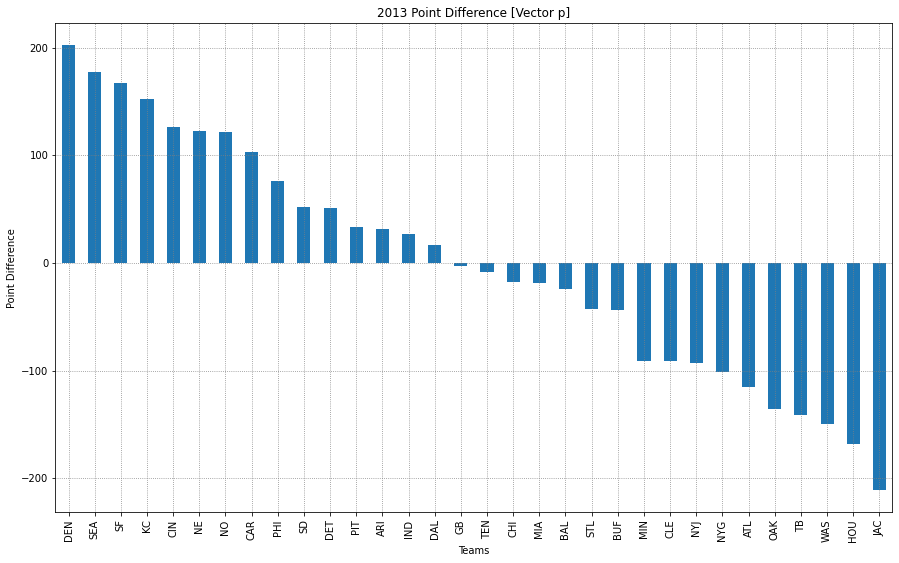

In [45]:
plot_barchart(bola[2013][0])
plt.xlabel('Teams')
plt.ylabel('Point Difference')
plt.title('2013 Point Difference [Vector p]')
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.show()

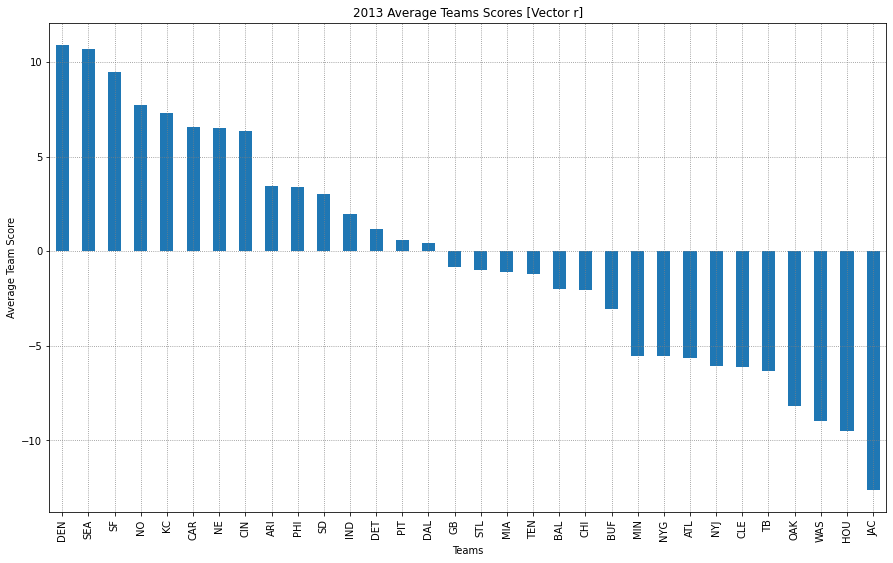

In [46]:
plot_barchart(bola[2013][1], kind='avg_score')
plt.xlabel('Teams')
plt.ylabel('Average Team Score')
plt.title('2013 Average Teams Scores [Vector r]')
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.show()

---
2014 Winner Prediction

In [65]:
new_bola_clean = pd.read_csv('../DSDA/data/nfl_2014.csv')
cols = ['year', 'week', 'home_team', 'away_team', 'home_score', 'away_score', 'winner']
new_bola_clean = new_bola_clean[cols]

In [66]:
data = get_data(new_bola_clean)

In [67]:
teamRankings = get_winners(data)

In [68]:
pDiff, avgScore = teamRankings[2014]

In [69]:
pDiff

,team,point_diff
NE,New England Patriots,125.615385
GB,Green Bay Packers,125.230769
BAL,Baltimore Ravens,110.692308
IND,Indianapolis Colts,107.769231
HOU,Houston Texans,88.384615
PHI,Philadelphia Eagles,87.923077
SEA,Seattle Seahawks,82.384615
DEN,Denver Broncos,71.692308
DAL,Dallas Cowboys,70.307692
PIT,Pittsburgh Steelers,65.692308


In [70]:
avgScore

,avg_score
NE,10.307692
GB,9.153846
BAL,7.769231
IND,7.692308
DEN,7.076923
SEA,6.692308
PHI,6.153846
MIA,4.153846
HOU,4.153846
KC,3.846154


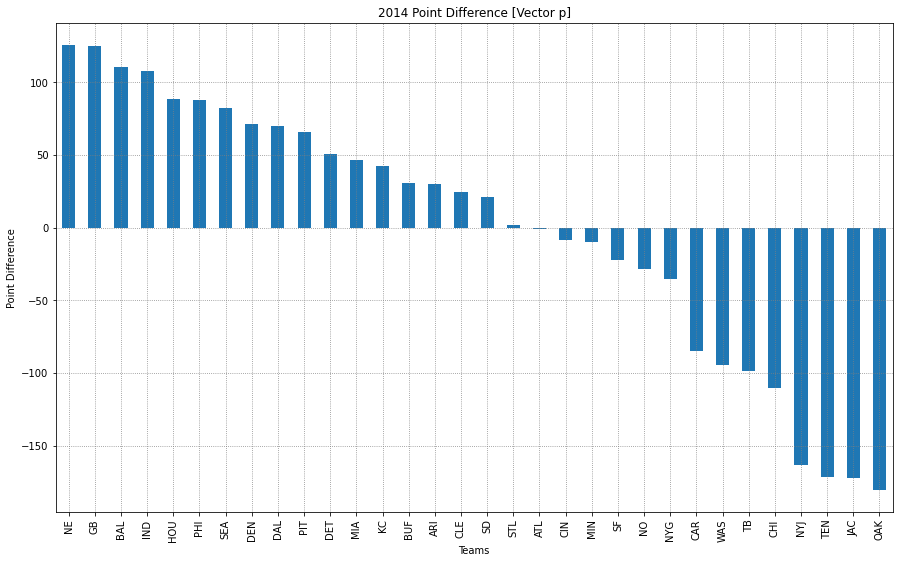

In [71]:
plot_barchart(teamRankings[2014][0])
plt.xlabel('Teams')
plt.ylabel('Point Difference')
plt.title('2014 Point Difference [Vector p]')
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.show()

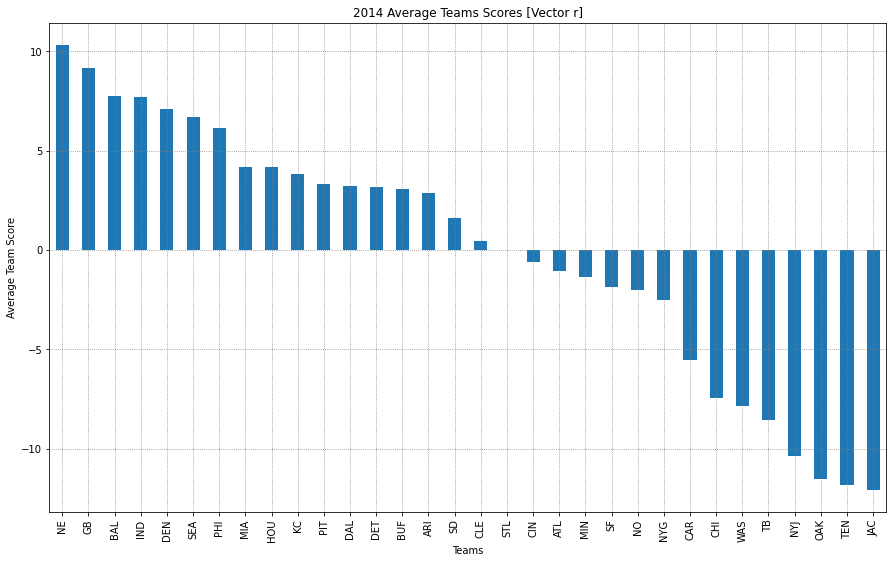

In [72]:
plot_barchart(teamRankings[2014][1], kind='avg_score')
plt.xlabel('Teams')
plt.ylabel('Average Team Score')
plt.title('2014 Average Teams Scores [Vector r]')
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.show()